# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter. 

In [1]:
# you will be prompted with a window asking to grant permissions
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/Personal_Stuff/UIUC/Sem_2/CS444/assignment1/"
# if not os.path.exists(datadir):
#   !ln -s "/Personal_Stuff/UIUC/Sem_2/CS444/assignment1/" $datadir
os.chdir(datadir)
# !pwd

In [3]:
# downloading Fashion-MNIST
import os
os.chdir(os.path.join(datadir,"fashion-mnist/"))
# !chmod +x ./get_data.sh
# !./get_data.sh
os.chdir(datadir)

# Imports

In [4]:
import random
import numpy as np
from data_process import get_FASHION_data, get_RICE_data
from scipy.spatial import distance
from models import Perceptron, SVM, Softmax, Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

fashion done
rice done


# Loading Fashion-MNIST

In the following cells we determine the number of images for each split and load the images.
<br /> 
TRAIN_IMAGES + VAL_IMAGES = (0, 60000]
, TEST_IMAGES = 10000

In [5]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 50000
VAL_IMAGES = 10000
normalize = True

In [6]:
data = get_FASHION_data(TRAIN_IMAGES, VAL_IMAGES, normalize=normalize)
X_train_fashion, y_train_fashion = data['X_train'], data['y_train']
X_val_fashion, y_val_fashion = data['X_val'], data['y_val']
X_test_fashion, y_test_fashion = data['X_test'], data['y_test']
n_class_fashion = len(np.unique(y_test_fashion))
print(len(np.unique(y_test_fashion)))
print("Number of train samples: ", X_train_fashion.shape[0])
print("Number of val samples: ", X_val_fashion.shape[0])
print("Number of test samples: ", X_test_fashion.shape[0])

fashion done
10
Number of train samples:  50000
Number of val samples:  10000
Number of test samples:  10000


# Loading Rice

In [7]:
# loads train / test / val splits of 80%, 20%, 20% 
data = get_RICE_data()
X_train_RICE, y_train_RICE = data['X_train'], data['y_train']
X_val_RICE, y_val_RICE = data['X_val'], data['y_val']
X_test_RICE, y_test_RICE = data['X_test'], data['y_test']
n_class_RICE = len(np.unique(y_test_RICE))
print(len(np.unique(y_test_RICE)))
print("Number of train samples: ", X_train_RICE.shape[0])
print("Number of val samples: ", X_val_RICE.shape[0])
print("Number of test samples: ", X_test_RICE.shape[0])

rice done
2
Number of train samples:  10911
Number of val samples:  3637
Number of test samples:  3637


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [326]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
### Learning rate
The learning rate controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. Here is a guide to help you find a right learning rate: 
- Try values ranging from 5.0 to 0.0005 to see the impact on model accuracy. 
- If the accuracy fluctuates a lot or diverges, the learning rate is too high. Try decreasing it by a factor of 10 (e.g. from 0.5 to 0.05). 
- If the accuracy is changing very slowly, the learning rate may be too low. Try increasing it by a factor of 10.
- You can also try adding a learning rate decay to slowly reduce the learning rate over each training epoch. For example, multiply the learning rate by 0.95 after each epoch.
- Plot training and validation accuracy over epochs for different learning rates. This will help you visualize the impact of the learning rate.
- [Here](https://towardsdatascience.com/https-medium-com-dashingaditya-rakhecha-understanding-learning-rate-dd5da26bb6de) is a detailed guide to learning rate.

### Number of Epochs
An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/perceptron.py**

The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


## Train Perceptron on Fashion-MNIST

Epoch 1/20, Loss: 11528, Lr: 2
Epoch 2/20, Loss: 7802, Lr: 0.2
Epoch 3/20, Loss: 7432, Lr: 0.020000000000000004
Epoch 4/20, Loss: 7413, Lr: 0.0020000000000000005
Epoch 5/20, Loss: 7389, Lr: 0.00020000000000000006
Epoch 6/20, Loss: 7388, Lr: 2.000000000000001e-05
Epoch 7/20, Loss: 7387, Lr: 2.0000000000000008e-06
Epoch 8/20, Loss: 7386, Lr: 2.000000000000001e-07
Epoch 9/20, Loss: 7386, Lr: 2.000000000000001e-08
Epoch 10/20, Loss: 7386, Lr: 2.000000000000001e-09
Epoch 11/20, Loss: 7386, Lr: 2.000000000000001e-10
Epoch 12/20, Loss: 7386, Lr: 2.0000000000000012e-11
Epoch 13/20, Loss: 7386, Lr: 2.000000000000001e-12
Epoch 14/20, Loss: 7386, Lr: 2.0000000000000013e-13
Epoch 15/20, Loss: 7386, Lr: 2.0000000000000016e-14
Epoch 16/20, Loss: 7386, Lr: 2.0000000000000017e-15
Epoch 17/20, Loss: 7386, Lr: 2.000000000000002e-16
Epoch 18/20, Loss: 7386, Lr: 2.000000000000002e-17
Epoch 19/20, Loss: 7386, Lr: 2.000000000000002e-18
Epoch 20/20, Loss: 7386, Lr: 2.000000000000002e-19


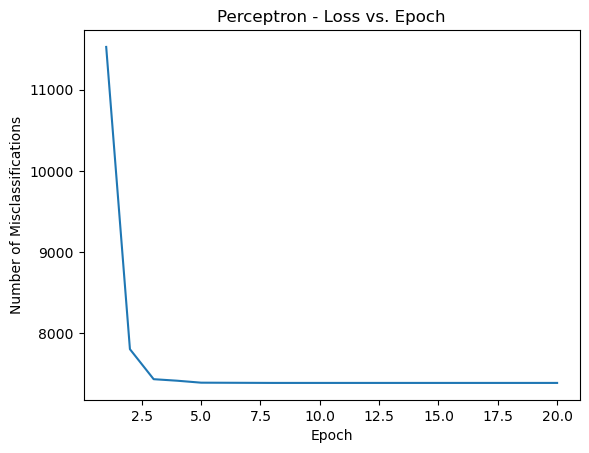

In [311]:
lr = 2
n_epochs = 20

percept_fashion = Perceptron(n_class_fashion, lr, n_epochs)
percept_fashion.train(X_train_fashion, y_train_fashion)
percept_fashion.plot_loss()

In [348]:
pred_percept = percept_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_fashion)))

The training accuracy is given by: 85.228000


### Validate Perceptron on Fashion-MNIST

In [349]:
pred_percept = percept_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_fashion)))

The validation accuracy is given by: 83.160000


### Test Perceptron on Fashion-MNIST

In [350]:
pred_percept = percept_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_fashion)))
print(f"Percent Error in accuracy: {(81.420-(get_acc(pred_percept, y_test_fashion)))}")

The testing accuracy is given by: 81.970000
Percent Error in accuracy: -0.5499999999999972


### Perceptron_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy, output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [428]:
output_submission_csv('kaggle/perceptron_submission_fashion.csv', percept_fashion.predict(X_test_fashion))

## Train Perceptron on Rice

In [330]:
lr = 5
n_epochs = 10

percept_RICE = Perceptron(n_class_RICE, lr, n_epochs)
percept_RICE.train(X_train_RICE, y_train_RICE)
# percept_RICE.plot_loss()

Epoch 1/10, Loss: 3058, Lr: 5
Epoch 2/10, Loss: 507, Lr: 0.5
Epoch 3/10, Loss: 20, Lr: 0.05
Epoch 4/10, Loss: 13, Lr: 0.005000000000000001
Epoch 5/10, Loss: 15, Lr: 0.0005000000000000001
Epoch 6/10, Loss: 15, Lr: 5.0000000000000016e-05
Epoch 7/10, Loss: 15, Lr: 5.000000000000002e-06
Epoch 8/10, Loss: 15, Lr: 5.000000000000002e-07
Epoch 9/10, Loss: 15, Lr: 5.0000000000000024e-08
Epoch 10/10, Loss: 15, Lr: 5.0000000000000026e-09


### Test Perceptron on Rice

In [331]:
pred_percept = percept_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_percept, y_train_RICE)))
# percept_RICE.plot_loss()

The training accuracy is given by: 99.862524


### Validate Perceptron on Rice

In [332]:
pred_percept = percept_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_percept, y_val_RICE)))

The validation accuracy is given by: 99.862524


### Test Perceptron on Rice

In [333]:
pred_percept = percept_RICE.predict(X_test_RICE)
print(get_acc(pred_percept, y_test_RICE))
print('The testing accuracy is given by: %f' % (get_acc(pred_percept, y_test_RICE)))

99.78003849326367
The testing accuracy is given by: 99.780038


# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Fashion-MNIST

Epoch 1/10, Loss: 81.74821980667107, Lr: 0.01
Epoch 2/10, Loss: 69.53919658956812, Lr: 0.005
Epoch 3/10, Loss: 65.52957096550564, Lr: 0.0025
Epoch 4/10, Loss: 63.77860138073732, Lr: 0.00125
Epoch 5/10, Loss: 62.89158844650586, Lr: 0.000625
Epoch 6/10, Loss: 62.49207260118678, Lr: 0.0003125
Epoch 7/10, Loss: 62.299855118820425, Lr: 0.00015625
Epoch 8/10, Loss: 62.200098664380555, Lr: 7.8125e-05
Epoch 9/10, Loss: 62.149310328298164, Lr: 3.90625e-05
Epoch 10/10, Loss: 62.12417249986038, Lr: 1.953125e-05


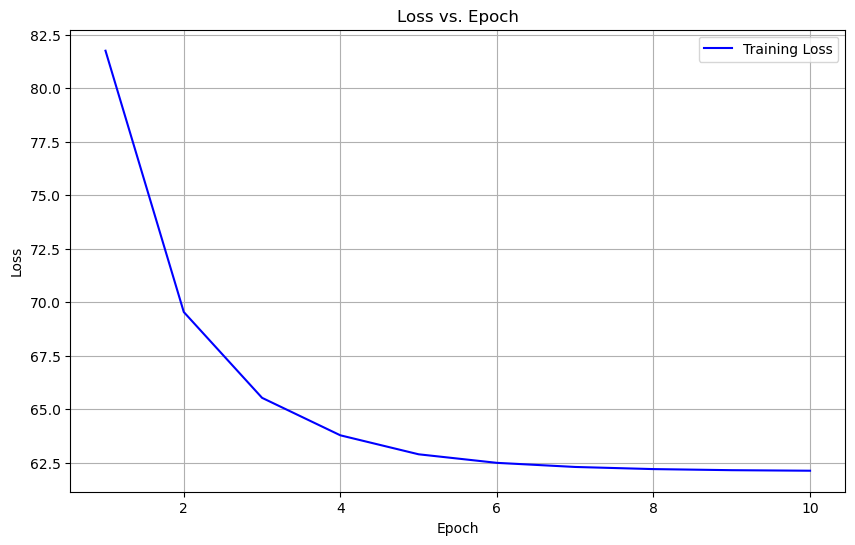

In [254]:
#FINAL DONT CHANGE

lr = 0.01
n_epochs = 10
reg_const = 0.005

svm_fashion = SVM(n_class_fashion, lr, n_epochs, reg_const)
svm_fashion.train(X_train_fashion, y_train_fashion)
svm_fashion.plot_loss()

In [351]:
pred_svm = svm_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_fashion)))

The training accuracy is given by: 85.168000


### Validate SVM on Fashion-MNIST

In [352]:
pred_svm = svm_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_fashion)))

The validation accuracy is given by: 84.380000


### Test SVM on Fashion-MNIST

In [429]:
pred_svm = svm_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_fashion)))
print(f"Percent Error in accuracy: {(81.220-(get_acc(pred_svm, y_test_fashion)))}")

The testing accuracy is given by: 83.630000
Percent Error in accuracy: -2.410000000000011


### SVM_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [430]:
output_submission_csv('kaggle/svm_submission_fashion.csv', svm_fashion.predict(X_test_fashion))

## Train SVM on Rice

In [ ]:
lr = 0.9
n_epochs = 50
reg_const = 0.005

svm_RICE = SVM(n_class_RICE, lr, n_epochs, reg_const)
svm_RICE.train(X_train_RICE, y_train_RICE)
# svm_RICE.plot_loss()

In [424]:
pred_svm = svm_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_RICE)))

The training accuracy is given by: 99.257630


### Validate SVM on Rice

In [425]:
pred_svm = svm_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_RICE)))

The validation accuracy is given by: 99.010173


### Test SVM on Rice

In [426]:
pred_svm = svm_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_RICE)))

The testing accuracy is given by: 99.367611


# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model. 

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with:
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/softmax.py**

The following code: 
- Creates an instance of the Softmax classifier class 
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train Softmax on Fashion-MNIST

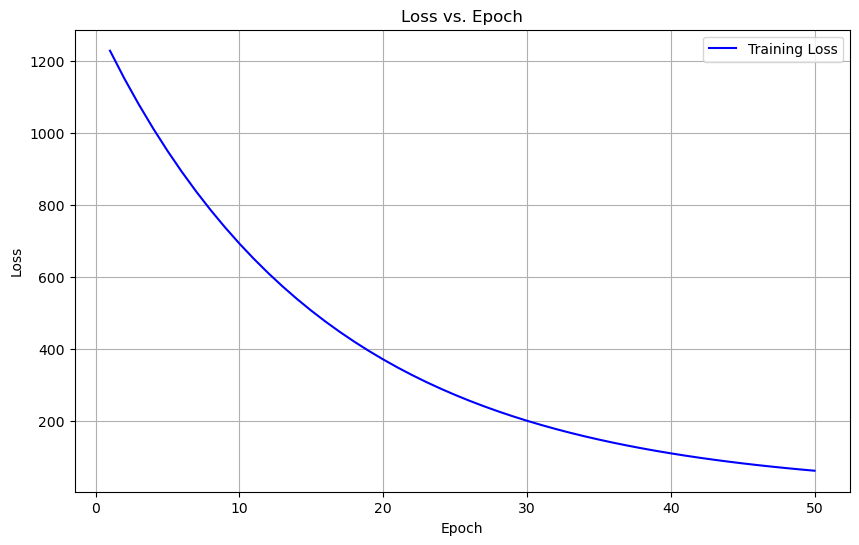

In [101]:
lr = 0.01
n_epochs = 50
reg_const = 0.5

softmax_fashion = Softmax(n_class_fashion, lr, n_epochs, reg_const)
softmax_fashion.train(X_train_fashion, y_train_fashion)
softmax_fashion.plot_loss()

In [102]:
pred_softmax = softmax_fashion.predict(X_train_fashion)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_fashion)))

The training accuracy is given by: 0.854820


### Validate Softmax on Fashion-MNIST

In [103]:
pred_softmax = softmax_fashion.predict(X_val_fashion)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_fashion)))

The validation accuracy is given by: 0.845200


### Testing Softmax on Fashion-MNIST

In [341]:
pred_softmax = softmax_fashion.predict(X_test_fashion)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_fashion)))
print(f"Percent Error in accuracy: {(82.980-(get_acc(pred_softmax, y_test_fashion)))}")

The testing accuracy is given by: 84.130000
Percent Error in accuracy: -1.1500000000000057


### Softmax_Fashion-MNIST Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Fashion-MNIST. Use the following code to do so:

In [431]:
output_submission_csv('kaggle/softmax_submission_fashion.csv', softmax_fashion.predict(X_test_fashion))

## Train Softmax on Rice

In [322]:
lr = 0.005
n_epochs = 250
reg_const = 0.5

softmax_RICE = Softmax(n_class_RICE, lr, n_epochs, reg_const)
softmax_RICE.train(X_train_RICE, y_train_RICE)
# softmax_RICE.plot_loss()

In [342]:
pred_softmax = softmax_RICE.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_softmax, y_train_RICE)))

The training accuracy is given by: 99.340115


### Validate Softmax on Rice

In [343]:
pred_softmax = softmax_RICE.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_softmax, y_val_RICE)))

The validation accuracy is given by: 99.147649


### Testing Softmax on Rice

In [344]:
pred_softmax = softmax_RICE.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_softmax, y_test_RICE)))

The testing accuracy is given by: 99.395106


# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Number of Epochs** - As described for perceptron.
- **Threshold** - The decision boundary of the classifier.


You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [ ]:
learning_rate = 0.5
n_epochs = 300
threshold = 0.5

lr = Logistic(learning_rate, n_epochs, threshold)
lr.train(X_train_RICE, y_train_RICE)

In [397]:
pred_lr = lr.predict(X_train_RICE)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_RICE)))

The training accuracy is given by: 98.368619


### Validate Logistic Classifer

In [398]:
pred_lr = lr.predict(X_val_RICE)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_RICE)))

The validation accuracy is given by: 98.322794


### Test Logistic Classifier

In [399]:
pred_lr = lr.predict(X_test_RICE)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_RICE)))

The testing accuracy is given by: 98.350289
